In [91]:
from Bio import SeqIO
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re

In [92]:
path = "/Users/mayongzhi/Desktop/bioinformatic_project/genotyping_tool/F38_otof-Rprimer.ab1"

In [93]:
record = SeqIO.read(path, "abi")
record

SeqRecord(seq=Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA'), id='F38_otof-Rprimer', name='F38_otof-Rprimer', description='', dbxrefs=[])

In [101]:
sequence = record.seq
sequence

Seq('CGGGGTGCCTAGGACATAATCTTGGAAAGCACAGGGAGGGTTGGGCCACTACCA...CTA')

In [109]:
pattern = "ATGCCGTGTCAGGCCGGCTA"

In [110]:
channels = []
for d in [1,2,3,4]:
    channels += [f'DATA{d}']
channels

['DATA1', 'DATA2', 'DATA3', 'DATA4']

In [111]:
matches = re.finditer(pattern, str(sequence))

for match in matches:
    start = match.start()
    end = match.end()
    matched_sequence = sequence[start:end]
    print(f"Found '{matched_sequence}' at position {start+1}-{end} in the sequence.")

Found 'ATGCCGTGTCAGGCCGGCTA' at position 497-516 in the sequence.


In [112]:
sub_trace = defaultdict(list)
for c in channels:
    sub_trace[c] = record.annotations['abif_raw'][c][start:end]
print("Sub trace data", sub_trace)

Sub trace data defaultdict(<class 'list'>, {'DATA1': (37, 36, 28, 25, 34, 10, 27, 29, 18, 22, 19, 17, 6, 24, 16, 5, 18, 15, 11, 10), 'DATA2': (51, 32, 37, 40, 34, 47, 37, 31, 39, 22, 31, 27, 28, 22, 19, 28, 24, 25, 32, 27), 'DATA3': (16, 18, 14, 24, 31, 9, 4, 21, 17, 42, 15, 17, 11, 16, 11, -1, 12, 1, 27, 0), 'DATA4': (63, 26, 35, 29, 30, 24, 21, 24, 14, 28, 21, 16, 12, 10, 17, 10, 17, 6, 12, 5)})


In [120]:
sub_trace = pd.DataFrame(sub_trace, columns = sub_trace.keys())
sub_trace.head()

,DATA1,DATA2,DATA3,DATA4
0,37,51,16,63
1,36,32,18,26
2,28,37,14,35
3,25,40,24,29
4,34,34,31,30


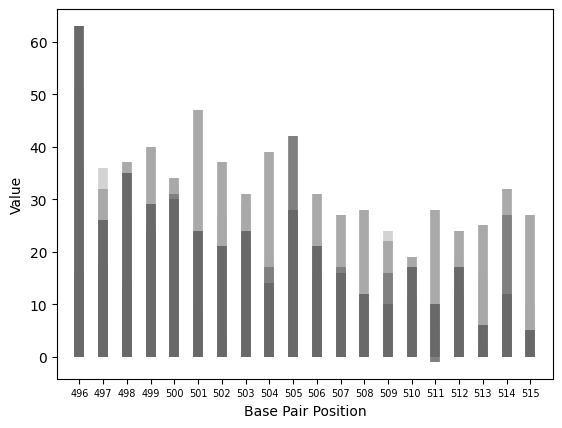

In [121]:
colors = ['#D3D3D3', '#A9A9A9', '#808080', '#696969'] #Light Grey, Dark Grey, Grey, Dim Grey
colorful_colors = ['#0000FF', '#008000', '#FF0000', '#FFFF00']  # Blue, Green, Red, Yellow
x_values = np.arange(start,end,1)

# Loop through x_values and columns to plot vertical lines
for i in range(len(x_values)):
    current_colors = colorful_colors if x_values[i] in [5, 11, 15] else colors
    for j, sub in enumerate(sub_trace.columns):
        plt.vlines(x=x_values[i], ymin=0, ymax=sub_trace[sub].iloc[i], color=current_colors[j % len(current_colors)], linewidth=7)


# Set x-axis label and y-axis label
plt.xlabel('Base Pair Position')
plt.ylabel('Value')
plt.xticks(x_values, fontsize = 7)

# Show plot
plt.show()